# Malaysian Import & Export Analysis 2016
Let's see which country  Malaysia Trades with the most

*Data Source: www.data.gov.my*

[Import Data Source](http://www.data.gov.my/data/ms_MY/dataset/major-import-sources)

[Export Data Source](http://www.data.gov.my/data/ms_MY/dataset/major-export-destination)

### Importing Data

In [1]:
# Original file was encoded in 'iso-8859-1'
import pandas as pd

MY_export = pd.read_csv('Major Export Destination.csv')
MY_import = pd.read_csv('Major Import Sources.csv')

MY_export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 5 columns):
Year                  2571 non-null int64
Month                 2571 non-null int64
Country               2571 non-null object
Country Code          2559 non-null object
Total Export (USD)    2571 non-null int64
dtypes: int64(3), object(2)
memory usage: 100.5+ KB


In [2]:
# Total Trade Countries
MY_export['Country'].nunique()

235

In [3]:
# checking for alignment before merging
(MY_export['Country']==MY_import['Country']).sum()==MY_export.shape[0]

True

In [4]:
df = pd.concat([MY_export, MY_import['Total Import (USD)']], axis=1)

In [5]:
# Change column names
df.columns = ['Year', 'Month', 'Country', 'Country Code', 'Export', 'Import']

In [6]:
# Re-arranging by Country and Month 
df = df.groupby(['Country','Month'])['Export','Import'].sum()
df.describe()

,Export,Import
count,2.571000e+03,2.571000e+03
mean,7.376845e+07,6.551131e+07
std,2.748438e+08,2.684533e+08
min,0.000000e+00,0.000000e+00
25%,2.296865e+05,6.710000e+02
50%,2.280379e+06,3.377040e+05
75%,1.354862e+07,1.066539e+07
max,2.533374e+09,3.236290e+09


Based on the quick summary above things doesn't look good. (MAX Export)-(MAX Import) seems to indicate a Trade Deficit of -702,916,000 (USD).

Wait.... let's not be too presumptuous and jump the gun here. That's not the whole picture. Let's dive into some charts and verify.

## Malaysia's Export

**Are you Hungry for some Data? I'll be separating it into a 5 full course meal. =)**
**Firstly, our starter Soup....**

Let's see who's buying from us...

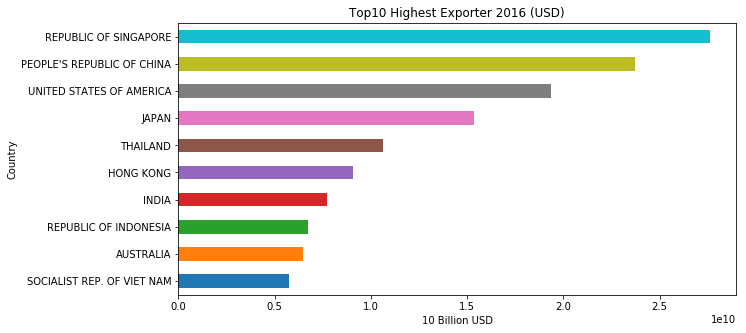

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt


# Top 10 Highest Export
TopSell = df.groupby(['Country'])['Export'].sum()

TopSell = TopSell.sort_values().tail(10)

# Bar plot
plt.figure(figsize=(10,5))
TopSell.plot(kind='barh',
             title="Top10 Highest Exporter 2016 (USD)")

plt.xlabel('10 Billion USD')
plt.show()

**Singapore!** Well no surprise since they're SEA's Central Port (Free Trade Zone)
It's nice to see we're doing well with the US of A...

## Malaysia's Import
Up Next...**Appetizers!!** 

who are we buying from?

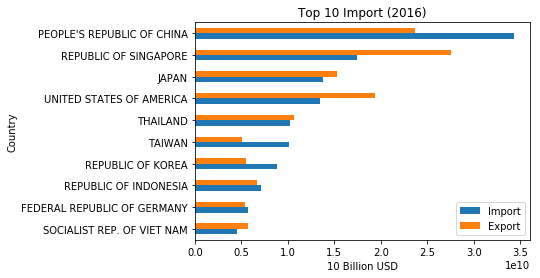

In [8]:
TopBuy = df.groupby(['Country'])['Import', 'Export'].sum()

# 10 Highest Import
TopBuy = TopBuy.sort_values(['Import']).tail(10)


TopBuy.plot(kind="barh",
             title='Top 10 Import (2016)')

plt.xlabel('10 Billion USD')
plt.show()

**Hello China!!** Well you probably saw this comming. Since everything is mostly made in China now. Even the phrase **"Made in China"** is not funny anymore.

But I'm surprised to see Vietnam made it to the list. I'm interested to know what we're buying from them.

## Trade Surplus/Deficit
**Now the Salad with extra mayo**

`Surplus/Deficit = Export - Import`

In [9]:
# Balance_Of_Trade = Export - Import
df['Surplus'] = df['Export'] - df['Import']


# Group by Country
Surplus = df.groupby(['Country'])['Surplus'].sum()

print(f'Balance of Trade: ${Surplus.sum():,} (USD)')

Balance of Trade: $21,229,125,853 (USD)


Wait what? **$21,229,125,853 (USD)** is that a Positive Number?

That's right!! When combined, in 2016 we achieved Total Trade Surplus of 86.9± Billion Ringgit

## Malaysia's Major Client
Who's supporting Malaysia's Growth? coming up our...**2 Part Main Dish**

In [10]:
# List of beneficial clients
MajorClient = Surplus.sort_values()

#Benefit.index.tolist()

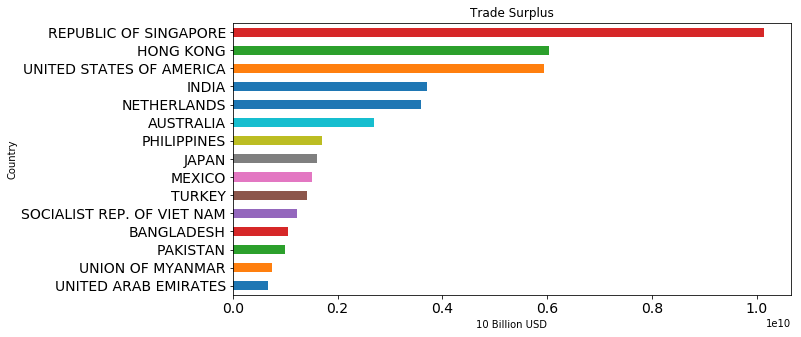

REPUBLIC OF SINGAPORE: $10,137,908,272


In [11]:
# Top 15 Major Clients

plt.figure(figsize=(10,5))
MajorClient.tail(15).plot(kind='barh',
                          title='Trade Surplus',
                          fontsize=14)
plt.xlabel('10 Billion USD')
plt.show()

print(f'{MajorClient.index[-1]}: ${MajorClient.iloc[-1]:,}')

Hey neighbour, how's it going?

yeap! Singapore. The Sibling rivalry, fighting over who invented the **Nasi Lemak** [Food Origin](https://goodyfeed.com/6-foods-that-both-singapore-and-malaysia-argued-to-have-invented/). But at the end of the day, Family supports each other, right? Wrong! Pay more for water! says Big brother.

But alas Nasi Lemak is from Malaysia. **Period**

## Malaysia's Spending List

In [12]:
# Spending list
Spend = Surplus[Surplus<0]

#Spend.index.tolist()

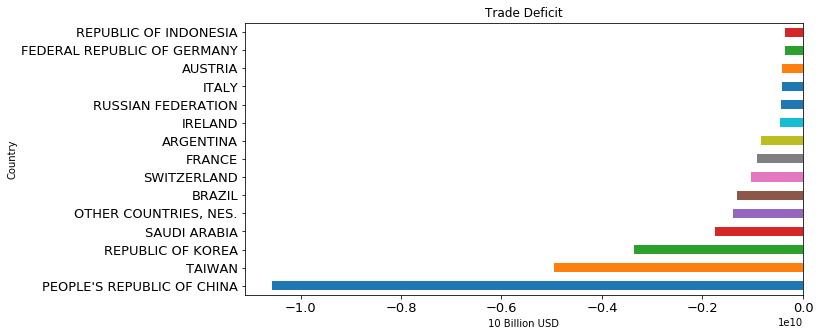

In [13]:
plt.figure(figsize=(10,5))

Spend.nsmallest(15).plot(kind='barh',
                         title='Trade Deficit',
                         fontsize=13)
plt.xlabel('10 Billion USD')
plt.show()

It's the elephant in the room isn't it?
It's no secret, Many businesses in Malaysia have been sourcing goods from China for years.

*China Numbaaar One!*

# Summary
**The Dessert** 

we need to talk....

In [14]:
Concern = Spend.idxmin()

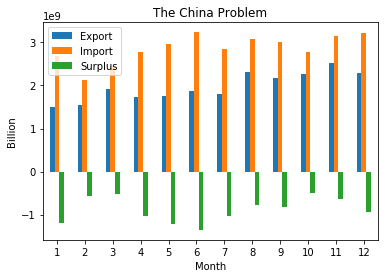

In [15]:
CN = df.loc[Concern]

CN.plot.bar(rot=0, title='The China Problem')

plt.xlabel('Month')
plt.ylabel('Billion')
plt.show()

####  Negative Surplus aka Trade Deficit

If this is (MY-CN), imagine (US-CN). Now we know why we have people like Donald Trump's pushing the Nationalist Movement.
China has come a long way since 1978. Today we wonder if they are still Socialist at heart.


Well that's all for now, I hope I managed to stir in some curiouisity.

I'll end it with a thought provoking Video. There's a lesson to be learnt here.
[War is inevitable, but what can we do about it?](https://www.ted.com/talks/graham_allison_is_war_between_china_and_the_us_inevitable?language=en)


Feel free to improve upon it.

In [16]:
# Stay Curious
# Nate C.